In [1]:
import numpy as np
import os
import os
import torch
from torch.utils.data import DataLoader, Dataset
from torch.nn.modules.loss import CrossEntropyLoss
from kapoorlabs_lightning.optimizers import Adam

from kapoorlabs_lightning.pytorch_models import DenseNet
from kapoorlabs_lightning.lightning_trainer import LightningModel
from napatrackmater.Trackvector import (
    SHAPE_FEATURES,
    DYNAMIC_FEATURES
)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


/home/debian/miniconda3/envs/kapoorlabsenv/lib/python3.10/site-packages/pyntcloud/utils/numba.py:5: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def groupby_count(xyz, indices, out):
/home/debian/miniconda3/envs/kapoorlabsenv/lib/python3.10/site-packages/pyntcloud/utils/numba.py:12: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def groupby_sum(xyz, indices, N, 

In [2]:
home_folder = '/home/debian/jz/'
base_dir = '/home/debian/jz/Mari_Data_Training/track_training_data/'


dynamic_gbr_npz_file = 'dynamic_training_data_gbr.npz'
shape_gbr_npz_file = 'shape_training_data_gbr.npz'

shape_validation_data = np.load(os.path.join(base_dir, shape_gbr_npz_file))
dynamic_validation_data = np.load(os.path.join(base_dir, dynamic_gbr_npz_file))
val_shape_goblet_arrays = shape_validation_data["goblet_val_arrays"]
val_shape_goblet_labels = shape_validation_data["goblet_val_labels"]
val_shape_basal_arrays = shape_validation_data["basal_val_arrays"]
val_shape_basal_labels = shape_validation_data["basal_val_labels"]
val_shape_radial_arrays = shape_validation_data["radial_val_arrays"]
val_shape_radial_labels = shape_validation_data["radial_val_labels"]

val_dynamic_goblet_arrays = dynamic_validation_data["goblet_val_arrays"]
val_dynamic_goblet_labels = dynamic_validation_data["goblet_val_labels"]
val_dynamic_basal_arrays = dynamic_validation_data["basal_val_arrays"]
val_dynamic_basal_labels = dynamic_validation_data["basal_val_labels"]
val_dynamic_radial_arrays = dynamic_validation_data["radial_val_arrays"]
val_dynamic_radial_labels = dynamic_validation_data["radial_val_labels"]

In [3]:
print(f'Goblet {val_shape_goblet_arrays.shape}, Basal {val_shape_basal_arrays.shape}, Radial {val_shape_radial_arrays.shape}')

Goblet (48350, 50, 6), Basal (221727, 50, 6), Radial (38607, 50, 6)


In [9]:
model_dir = f'{home_folder}Mari_Models/TrackModels/'
gbr_shape_model_json = f'{model_dir}shape_feature_lightning_densenet_gbr/shape_densenet.json'
device = 'cpu'
loss_func =  CrossEntropyLoss()
gbr_shape_lightning_model, gbr_shape_torch_model = LightningModel.extract_mitosis_model(
    DenseNet,
    gbr_shape_model_json,
    loss_func,
    Adam,
    map_location=torch.device(device),
    local_model_path = os.path.join(model_dir, 'shape_feature_lightning_densenet_gbr'),
    
)



gbr_shape_torch_model.eval()

DenseNet(
  (features): Sequential(
    (0): Conv1d(6, 32, kernel_size=(7,), stride=(2,), padding=(3,))
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool1d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock0): DenseBlock(
      (denselayer0): DenseLayer(
        (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): ReLU(inplace=True)
        (conv2): Conv1d(32, 128, kernel_size=(1,), stride=(1,))
        (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv1): Conv1d(128, 32, kernel_size=(3,), stride=(1,), padding=(1,))
      )
      (denselayer1): DenseLayer(
        (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): ReLU(inplace=True)
        (conv2): Conv1d(64, 128, kernel_size=(1,), stride

In [10]:

gbr_dynamic_model_json = f'{model_dir}dynamic_feature_lightning_densenet_gbr/dynamic_densenet.json'

gbr_dynamic_lightning_model, gbr_dynamic_torch_model = LightningModel.extract_mitosis_model(
    DenseNet,
    gbr_dynamic_model_json,
    loss_func,
    Adam,
    map_location=torch.device(device),
    local_model_path = os.path.join(model_dir, 'dynamic_feature_lightning_densenet_gbr'),
    
)

gbr_dynamic_torch_model.eval()

DenseNet(
  (features): Sequential(
    (0): Conv1d(12, 32, kernel_size=(7,), stride=(2,), padding=(3,))
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool1d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock0): DenseBlock(
      (denselayer0): DenseLayer(
        (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): ReLU(inplace=True)
        (conv2): Conv1d(32, 128, kernel_size=(1,), stride=(1,))
        (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv1): Conv1d(128, 32, kernel_size=(3,), stride=(1,), padding=(1,))
      )
      (denselayer1): DenseLayer(
        (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): ReLU(inplace=True)
        (conv2): Conv1d(64, 128, kernel_size=(1,), strid

In [11]:
class_map_gbr = {
    0: "Basal",
    1: "Radial",
    2: "Goblet"
}

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        label = self.labels[idx]
        return torch.tensor(sample).permute(1, 0).float(), label


def make_predictions(model, data, labels, batch_size=32, subset_size=None):
    if subset_size is not None:
        indices = np.random.choice(len(data), size=subset_size, replace=False)
        data = data[indices]
        labels = labels[indices]
    predictions = []
    true_labels = []
    
    dataset = CustomDataset(data, labels)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    
    model.eval()  
    
    with torch.no_grad():
        for batch_data, batch_labels in dataloader:
            batch_data = batch_data.to('cuda' if torch.cuda.is_available() else 'cpu')
            batch_labels = batch_labels.to('cuda' if torch.cuda.is_available() else 'cpu')
            
            model_predictions = model(batch_data)
            probabilities = torch.softmax(model_predictions, dim=1)
            predicted_classes = torch.argmax(probabilities, dim=1)
            
            predictions.extend(predicted_classes.cpu().numpy())
            true_labels.extend(batch_labels.cpu().numpy())
    
    return np.array(predictions), np.array(true_labels)


In [12]:
subset_size = 10000


shape_basal_preds, shape_basal_labels = make_predictions(gbr_shape_torch_model, val_shape_basal_arrays, val_shape_basal_labels, batch_size=32, subset_size = subset_size)
dynamic_basal_preds, dynamic_basal_labels = make_predictions(gbr_dynamic_torch_model, val_dynamic_basal_arrays, val_dynamic_basal_labels, batch_size=32, subset_size = subset_size)

shape_goblet_preds, shape_goblet_labels = make_predictions(gbr_shape_torch_model, val_shape_goblet_arrays, val_shape_goblet_labels, batch_size=32, subset_size = subset_size)
dynamic_goblet_preds, dynamic_goblet_labels = make_predictions(gbr_dynamic_torch_model, val_dynamic_goblet_arrays, val_dynamic_goblet_labels, batch_size=32, subset_size = subset_size)

shape_radial_preds, shape_radial_labels = make_predictions(gbr_shape_torch_model, val_shape_radial_arrays, val_shape_radial_labels, batch_size=32, subset_size = subset_size)
dynamic_radial_preds, dynamic_radial_labels = make_predictions(gbr_dynamic_torch_model, val_dynamic_radial_arrays, val_dynamic_radial_labels, batch_size=32, subset_size = subset_size)

all_preds = np.concatenate([shape_basal_preds, dynamic_basal_preds, shape_goblet_preds, dynamic_goblet_preds, shape_radial_preds, dynamic_radial_preds])
all_labels = np.concatenate([shape_basal_labels, dynamic_basal_labels, shape_goblet_labels, dynamic_goblet_labels, shape_radial_labels, dynamic_radial_labels])

conf_matrix = confusion_matrix(all_labels, all_preds)
print(conf_matrix)

[[20000     0     0]
 [    0 20000     0]
 [    0     0 20000]]


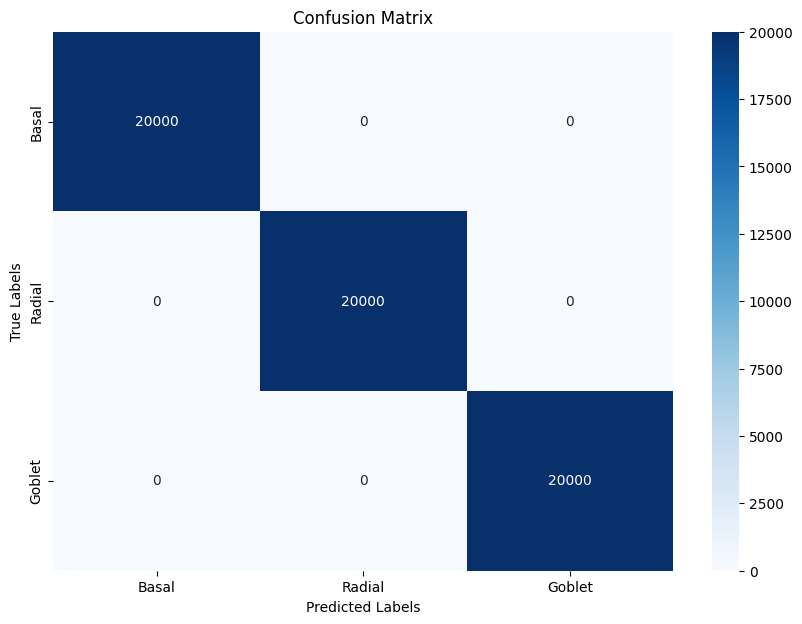

In [13]:
def plot_confusion_matrix(true_labels, predictions, class_names):
    conf_matrix = confusion_matrix(true_labels, predictions)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.savefig('classification_metrics/confusion_matrix_cell_fate_gbr,png', dpi=300)
    plt.show()

class_names = class_map_gbr.values()
plot_confusion_matrix(all_labels, all_preds, class_names)